# 8.1 Metropolis Algorithm

In [ ]:
using LinearAlgebra
using Plots
using Colors
using Statistics
using Polynomials
using StatsBase
gr()

Function that generates a raandom number in a desired range:

In [ ]:
function randRanged(lowRange, upRange)
    y = lowRange + (upRange - lowRange) * rand()
    return y
end

initial values

In [ ]:
sigma = 1 #sigma of the distribution
gaussian(x) = 1 / sigma / sqrt(2 * pi) * exp(- x^2 / 2 / sigma) #the distribution function (normalized)
stepLength = 2.95

Function applying the Metropolis algorithm

In [ ]:
function metropolisRand(p, x0, delta, n) #n is the number of random numbers we want to generate
    randomNums = []
    acceptance = 0
    x = x0
    for i in 1:n
        y = x + delta * randRanged(-1, 1)
        if rand() < (p(y) / p(x))
            x = y
            acceptance += 1
        end
        push!(randomNums, x)
    end
    acceptanceRate = acceptance / n
    return randomNums, acceptanceRate
end

We test the generator to see if the distribution is gaussian.

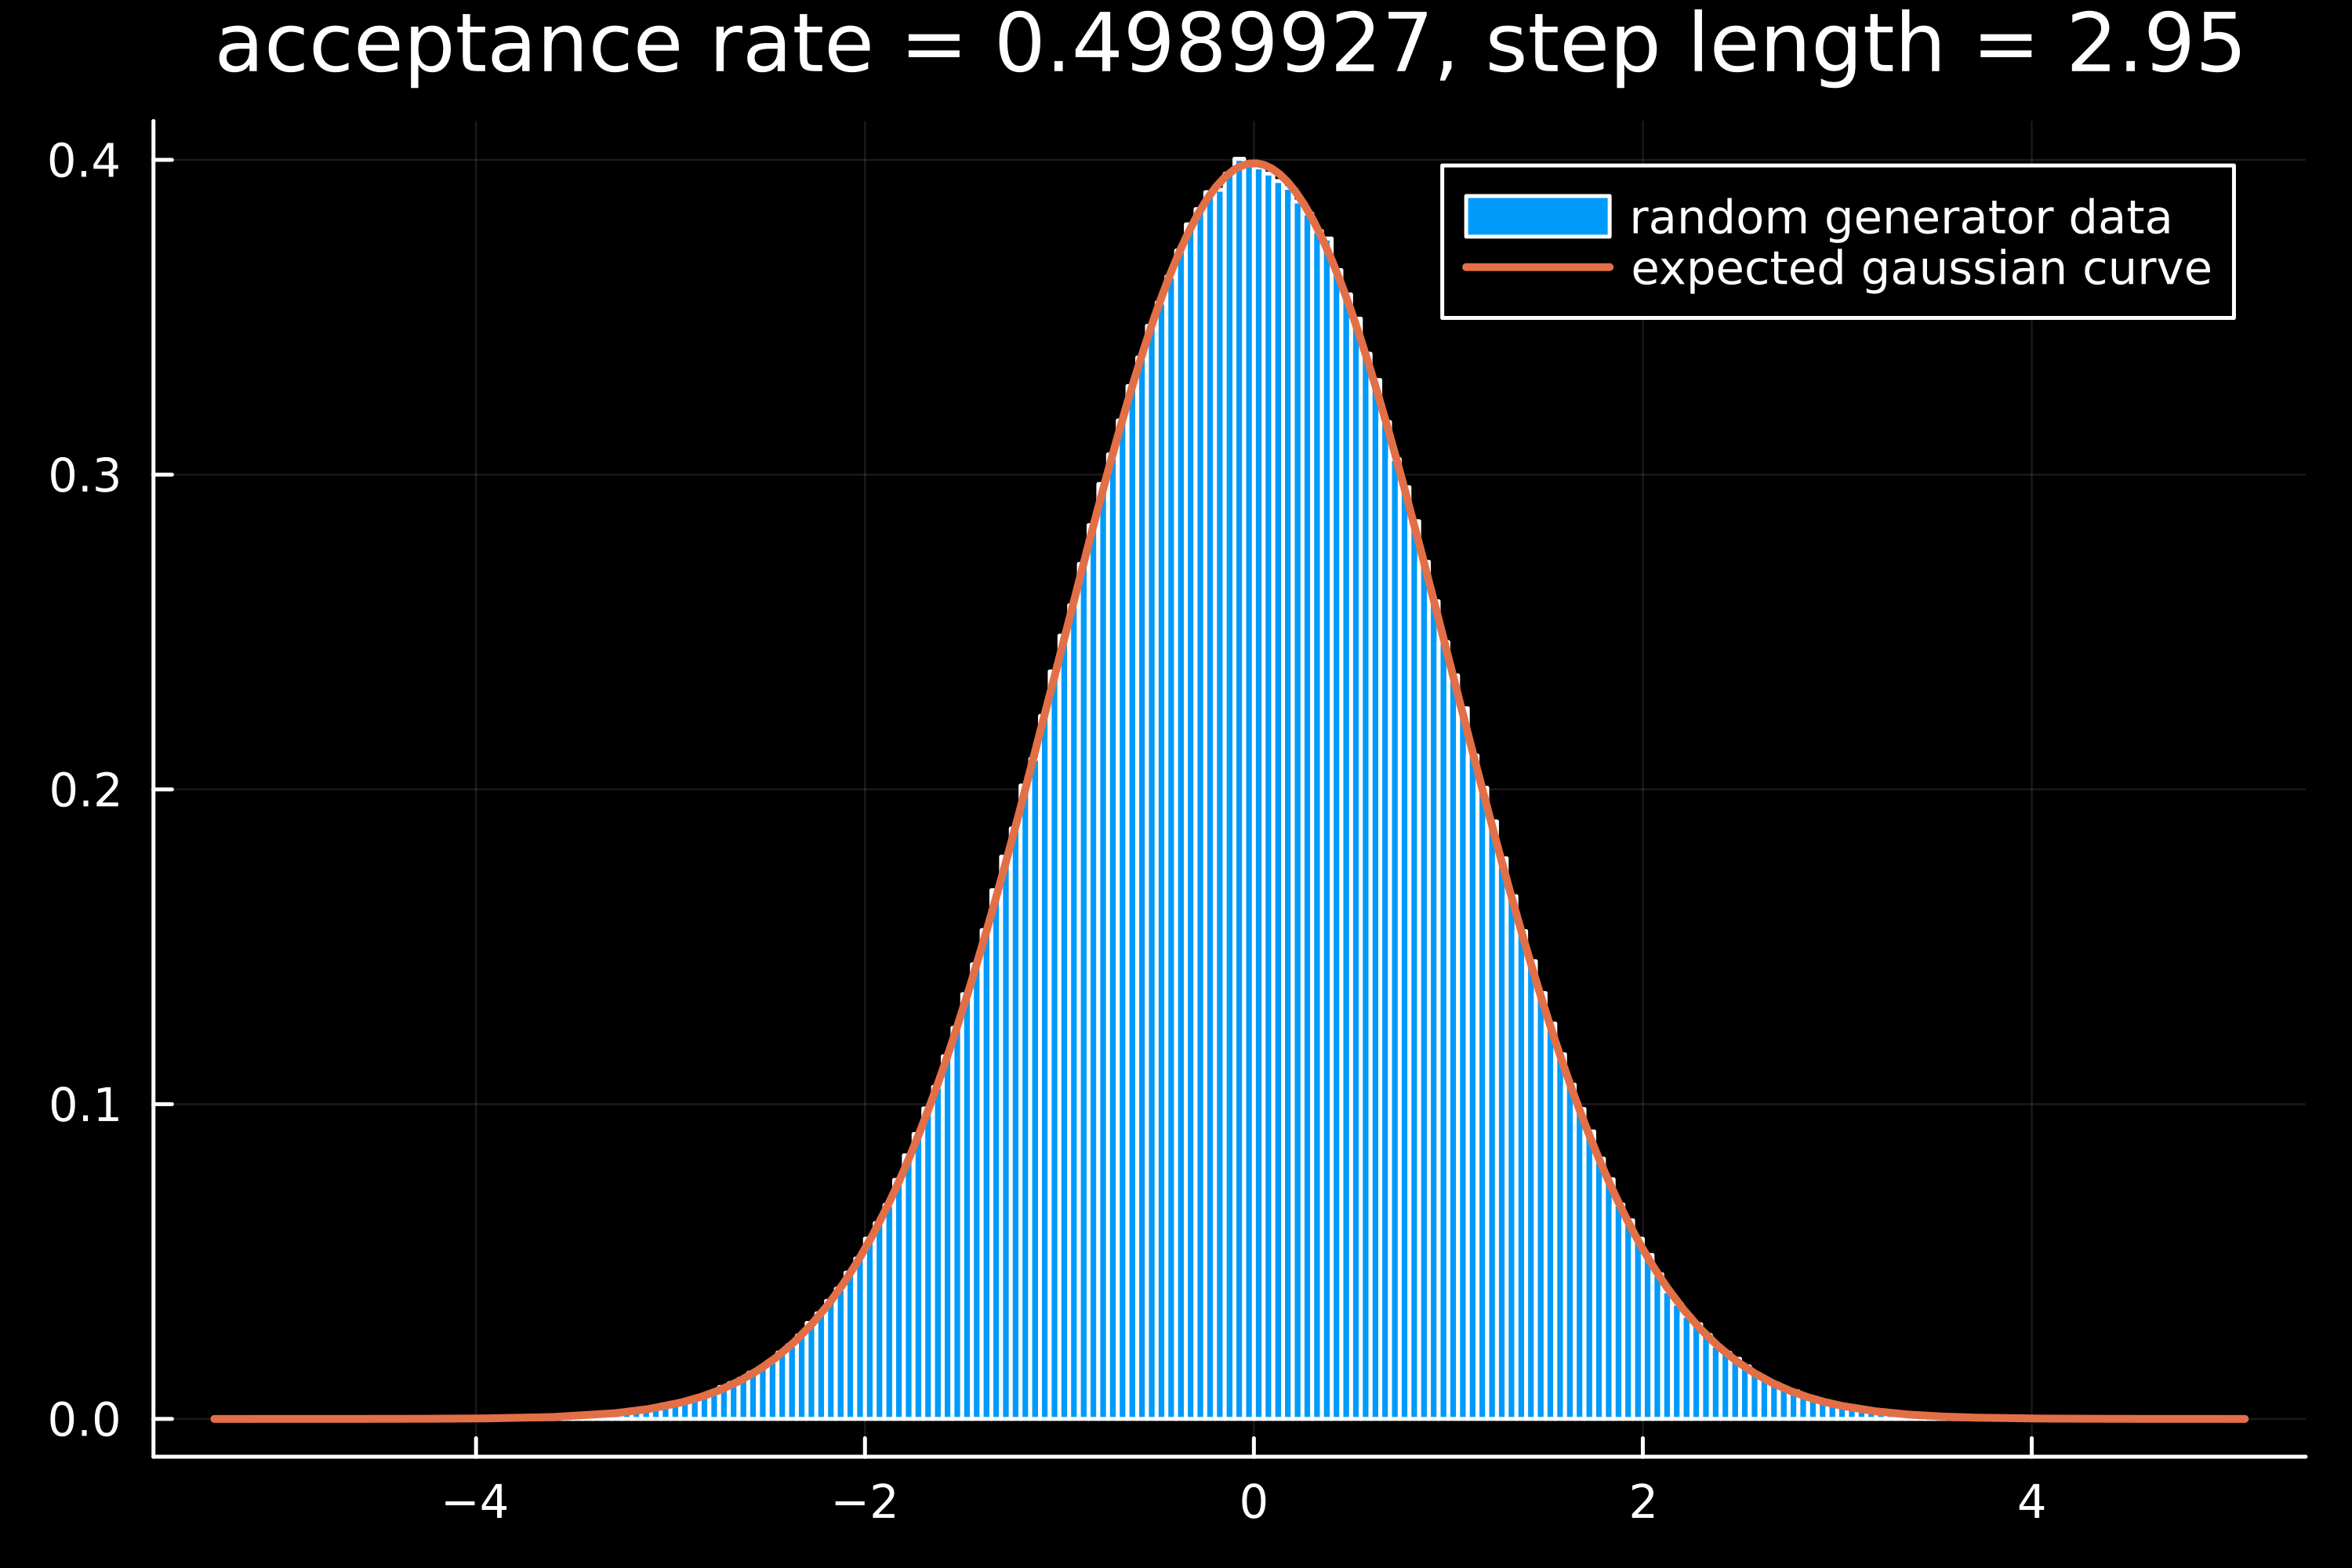

In [27]:
randomNums, acceptanceRate = metropolisRand(gaussian, randRanged(-1, 1), stepLength, 10000000)
barhist(randomNums, title = "acceptance rate = $acceptanceRate, step length = $stepLength", background = :black,  normalize = :pdf, bins = 200
, label = "random generator data", dpi = 500)
plot!(gaussian, lw = 2, label = "expected gaussian curve")

After testing the required step lengths for every acceptance rate is as follows: (the acceptance rate error is around $\pm 0.005$)<br>
| acceptance rate | 0.1  | 0.2  | 0.3  | 0.4  | 0.5  | 0.6 | 0.7  | 0.8  | 0.9 |
|-----------------|------|------|------|------|------|-----|------|------|-----|
| step length     | 15.9 | 7.95 | 5.32 | 3.89 | 2.95 | 2.2 | 1.58 | 1.02 | 0.5 |

the values where found by hand using the testing code bellow because for the given problem it was just more efficient to do it by hand.

In [ ]:
acceptanceRates = []
for i in 1:10
    randomNums, acceptanceRate = metropolisRand(gaussian, randRanged(-1, 1), 0.5, 100000)
    push!(acceptanceRates, acceptanceRate)
end
acceptanceRates

Now we will define a function that returns $c(j)$ for a set of random numbers

In [ ]:
function correlation(j, RandNums)
    RandNums2 = []
    for i in 1:length(RandNums)
        push!(RandNums2, RandNums[i]^2)
    end
    sigma2 = mean(RandNums2) - mean(RandNums)
    A = [] #x_i x_{i + j}
    B1 = [] #x_i
    B2 = [] #x_{i + j}
    for i in 1:(length(RandNums) - j)
        push!(A, RandNums[i] * RandNums[i + j])
        push!(B1, RandNums[i])
        push!(B2, RandNums[i + j])
    end
    c = (mean(A) - mean(B1) * mean(B2)) / sigma2
    if c<0
        c = 0
    end
    return c
end

Now if we draw the $log(c(j))$ based on $j$ plot linearly, the slope will be $-\frac{1}{\xi}$ so we will use that to calculate $\xi$

In [ ]:
randomNums, acceptanceRate = metropolisRand(gaussian, randRanged(-1, 1), 2.95, 1000000)
logCj = Float64[]
Cj = Float64[]
j = Float64[]
for i in 1:12
    cj = correlation(i, randomNums)
    push!(j, i)
    push!(logCj, log(cj))
    push!(Cj, cj)
end
fh = Polynomials.fit(j, logCj, 1)
xi = - 1/fh[1]

The correlation lengths calculated using the code above are as follows: <br>
| acceptance rate    | 0.1  | 0.2  | 0.3  | 0.4  | 0.5  | 0.6  | 0.7  | 0.8  | 0.9  |
|--------------------|------|------|------|------|------|------|------|------|------|
| correlation length | 7.26 | 3.67 | 2.36 | 1.51 | 2.16 | 2.82 | 4.16 | 8.00 | 27.6 |

We test one of the curves for acceptance rate of 0.5

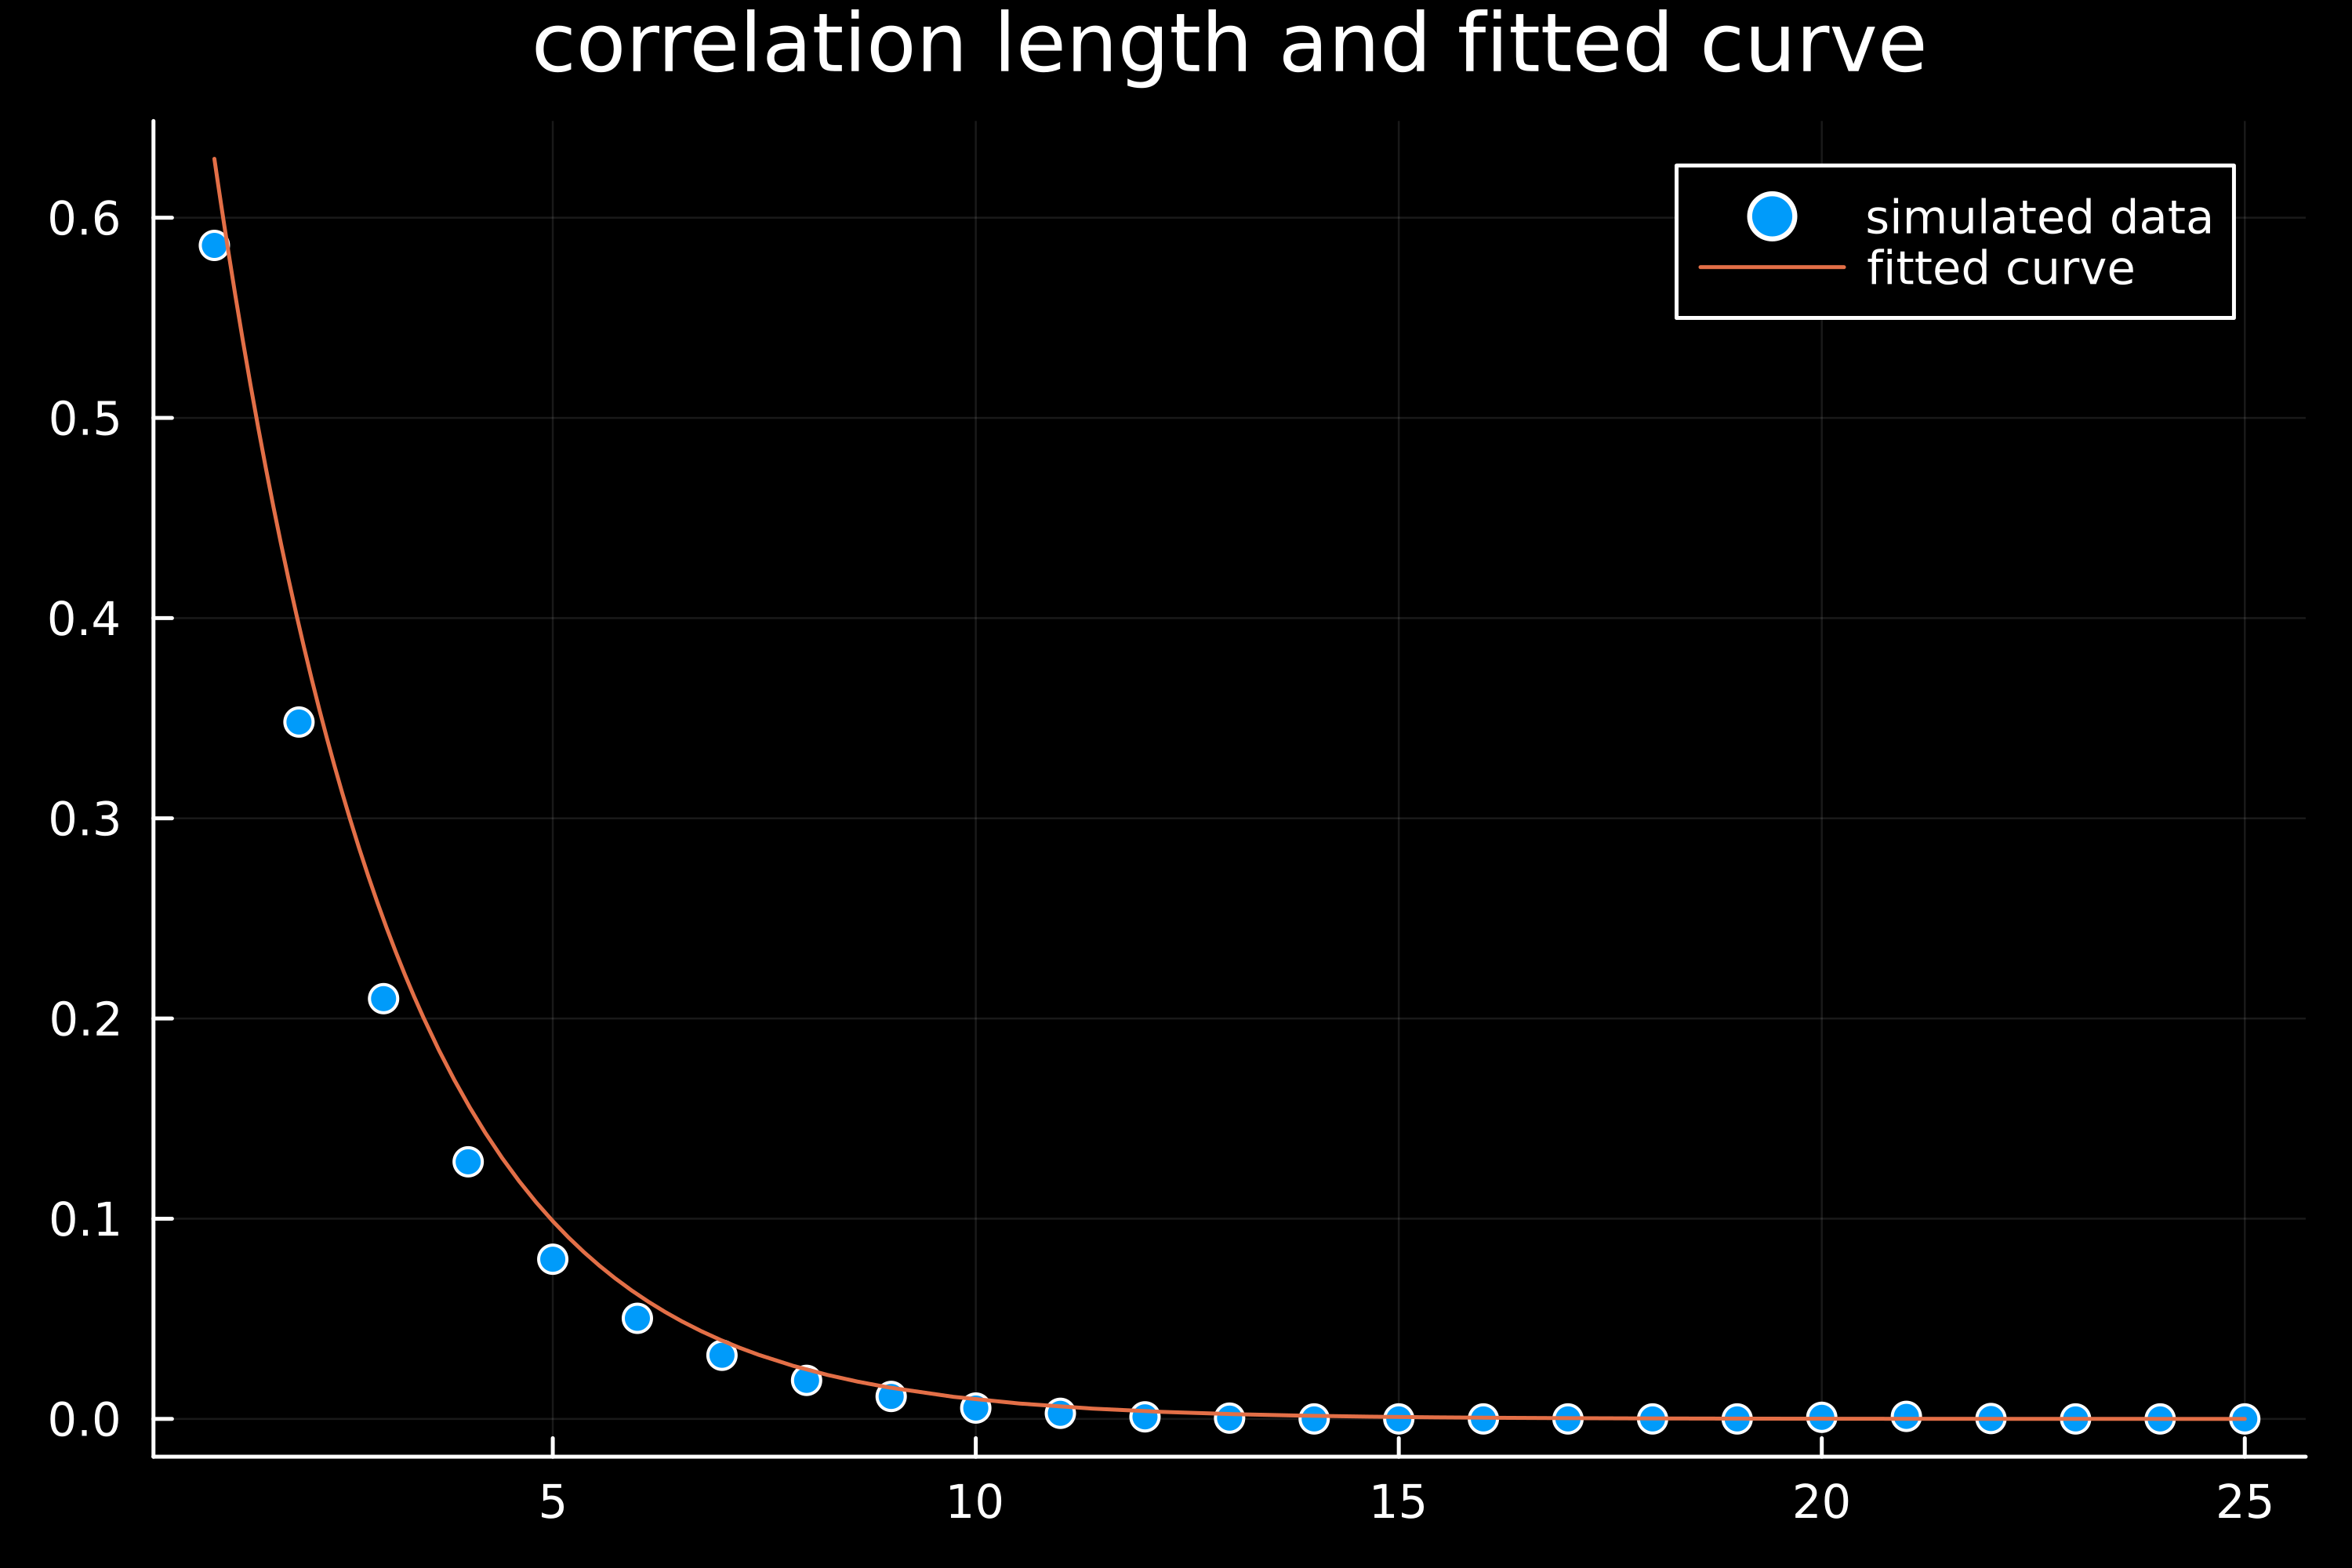

In [33]:
randomNums, acceptanceRate = metropolisRand(gaussian, randRanged(-1, 1), 2.95, 1000000)
logCj = Float64[]
Cj = Float64[]
j = Float64[]
for i in 1:25
    cj = correlation(i, randomNums)
    push!(j, i)
    push!(logCj, log(cj))
    push!(Cj, cj)
end
scatter(j, Cj, background = :black, dpi = 500, title = "correlation length and fitted curve", label = "simulated data")
fittedCurve(x) = exp(-x/2.16)
plot!(fittedCurve, label = "fitted curve" )